 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
csv_path = Path("../Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_df = pd.read_csv(csv_path)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csv_path = Path("../Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_path)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
csv_path = Path("../Resources/sp_tsx_history.csv")
sp_df = pd.read_csv(csv_path)
sp_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [10]:
# Check Data Types
sp_df.dtypes

Date     object
Close    object
dtype: object

In [11]:
# Fix Data Types

# Convert the 'Date' column to datetime format
sp_df['Date'] = pd.to_datetime(sp_df['Date'])

# Remove the dollar sign and commas from the 'Close' column values          
sp_df['Close'] = sp_df['Close'].str.replace('$', '').str.replace(',', '').astype(float)   
            
sp_df.dtypes

C:\Users\ctzsn\AppData\Local\Temp\ipykernel_20044\760170168.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_df['Close'] = sp_df['Close'].str.replace('$', '').str.replace(',', '').astype(float)


Date     datetime64[ns]
Close           float64
dtype: object

In [12]:
# Drop nulls
sp_df.isnull().sum()
sp_df.dropna(inplace=True)
sp_df.head()

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99


In [13]:
# Calculate Daily Returns
sp_df['Daily_Returns'] = sp_df['Close'].pct_change()
sp_df.head()

,Date,Close,Daily_Returns
0,2012-10-01,12370.19,NaN
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_df.rename(columns={'Close': 'S&P_TSX_Close'}, inplace=True)
sp_df.head()

,Date,S&P_TSX_Close,Daily_Returns
0,2012-10-01,12370.19,NaN
1,2012-10-02,12391.23,0.001701
2,2012-10-03,12359.47,-0.002563
3,2012-10-04,12447.68,0.007137
4,2012-10-05,12418.99,-0.002305


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

# Convert the 'Date' columns in all three dataframes to datetime64[ns] type
whale_df['Date'] = pd.to_datetime(whale_df['Date'])
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
sp_df['Date'] = pd.to_datetime(sp_df['Date'])

# Merge the dataframes on the 'Date' column
combined_df = whale_df.merge(algo_df, on='Date').merge(sp_df[['Date', 'Daily_Returns']], on='Date')
combined_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Returns
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of All Portfolios'}, xlabel='Date'>

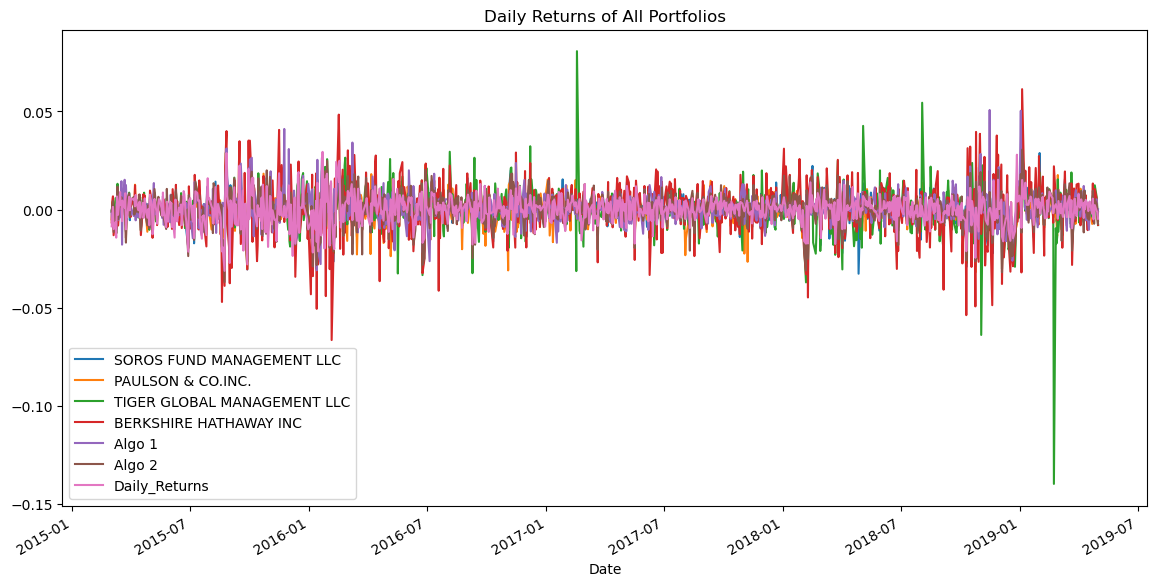

In [16]:
# Plot daily returns of all portfolios

# Set the 'Date' column as the index for plotting
combined_df.set_index('Date', inplace=True)

# Plot daily returns of all portfolios
combined_df_plot = combined_df.plot(figsize=(14,7), title='Daily Returns of All Portfolios')

combined_df_plot


#### Calculate and Plot cumulative returns.

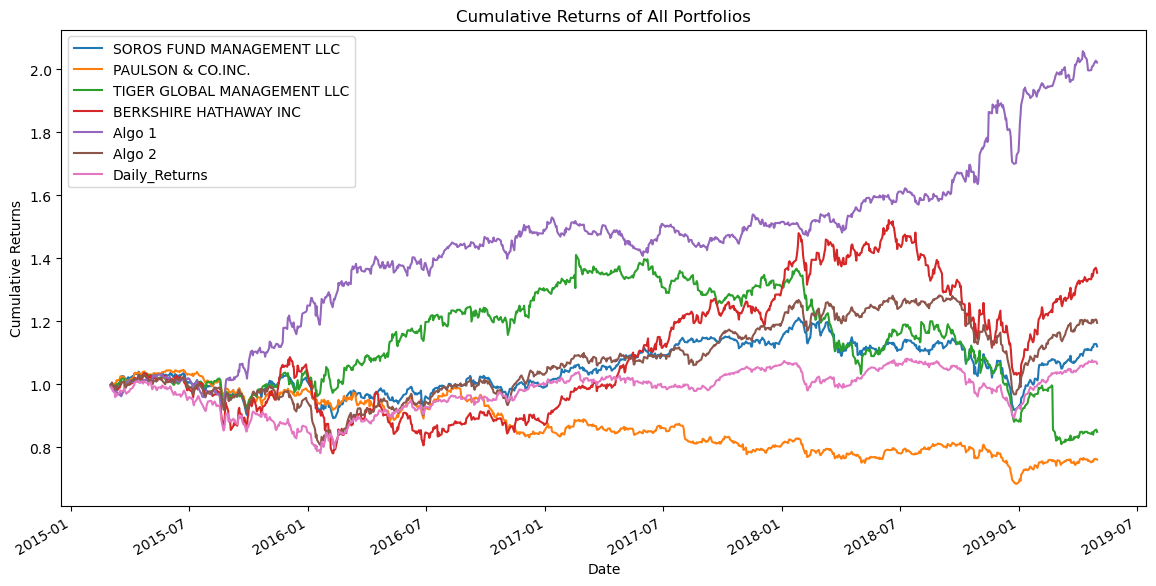

In [17]:
# Calculate cumulative returns of all portfolios
combined_cumulative_df = (1 + combined_df).cumprod()
# Plot cumulative returns
combined_cumulative_df.plot(figsize=(14,7), title='Cumulative Returns of All Portfolios')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


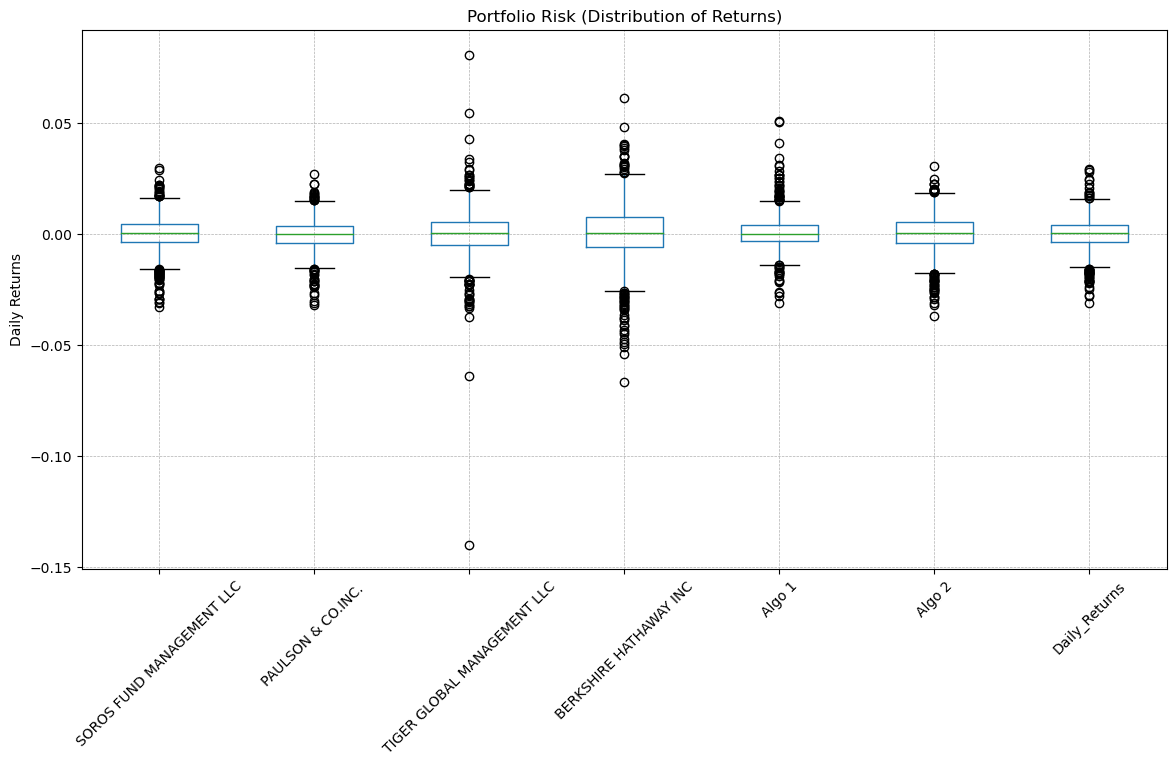

In [18]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(14,7))
plt.title('Portfolio Risk (Distribution of Returns)')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
Daily_Returns                  0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_df_std = combined_df['Daily_Returns'].std()
print(sp_df_std)

# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = daily_std[daily_std > sp_df_std]
print(riskier_portfolios.index)

0.007034167748577725
Index(['SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC',
       'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2'],
      dtype='object')


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21-Day Rolling Standard Deviation of All Portfolios'}, xlabel='Date'>

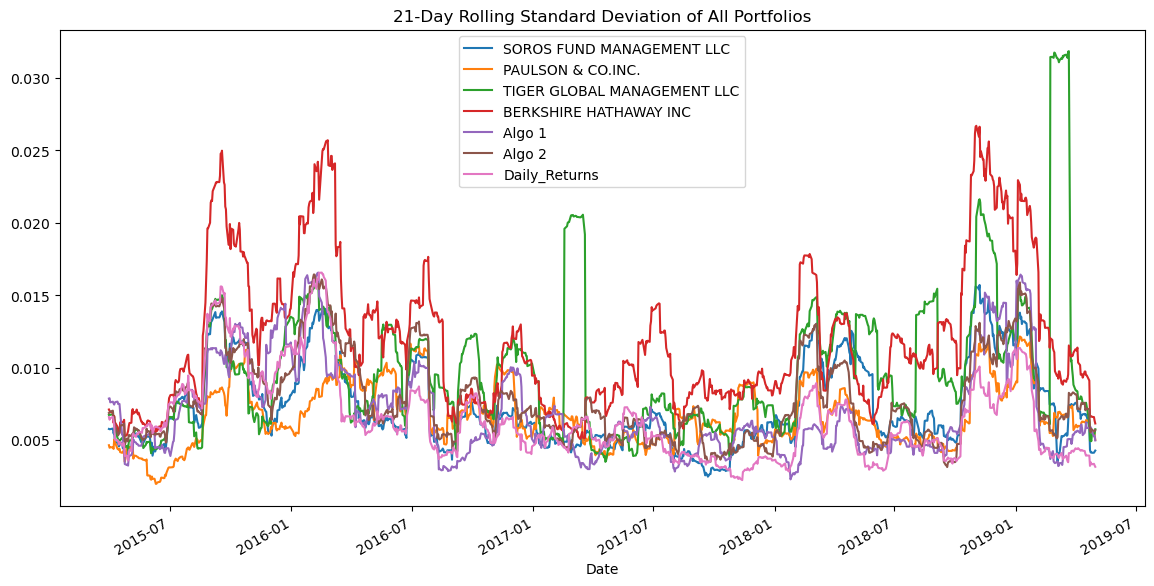

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(14,7), title='21-Day Rolling Standard Deviation of All Portfolios')

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation_matrix = combined_df.corr()
# Display de correlation matrix
print(correlation_matrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
Daily_Returns                                 0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2         

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000011
2019-04-26    0.000010
2019-04-29    0.000010
2019-04-30    0.000009
2019-05-01    0.000011
Length: 1029, dtype: float64
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000011
2019-04-26    0.000011
2019-04-29    0.000011
2019-04-30    0.000010
2019-05-01    0.000010
Name: Daily_Returns, Length: 1029, dtype: float64
Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.932640
2019-04-26    0.945220
2019-04-29    0.877395
2019-04-30    0.902627
2019-05-01    1.119309
Length: 1029, dtype: float64


<Axes: title={'center': 'Rolling Beta Trend for TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

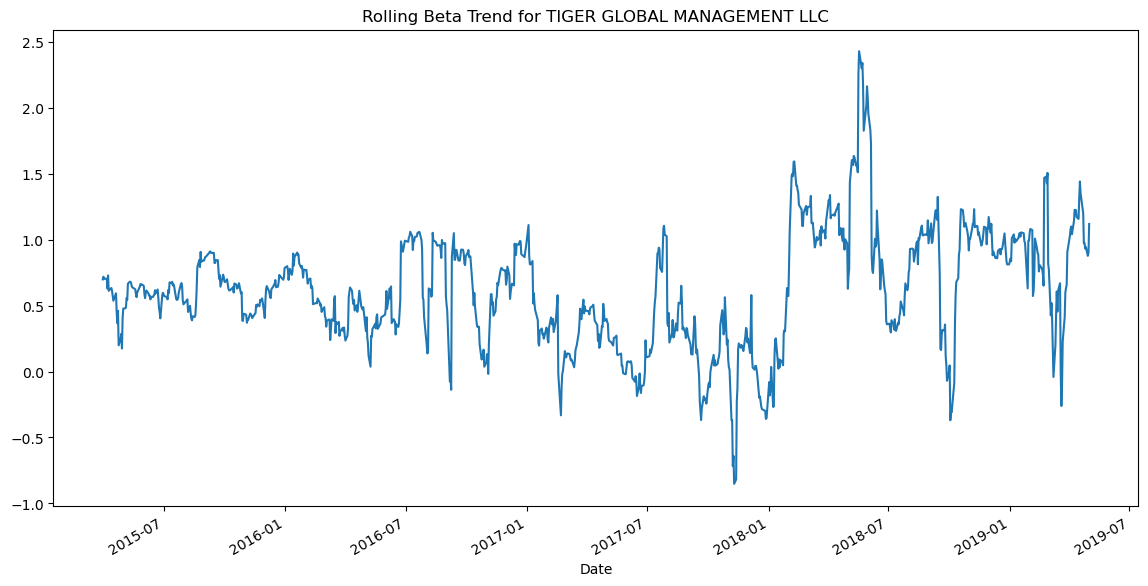

In [24]:
# Calculate covariance of a single portfolio
tiger_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).cov(combined_df['Daily_Returns'])
print(tiger_covariance)
# Calculate variance of S&P TSX
sp_df_variance = combined_df['Daily_Returns'].rolling(window=21).var()
print(sp_df_variance)
# Computing beta
tiger_beta = tiger_covariance / sp_df_variance
print(tiger_beta)
# Plot beta trend
tiger_beta.plot(figsize=(14,7), title='Rolling Beta Trend for TIGER GLOBAL MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'Exponentially Weighted Beta Trend for TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

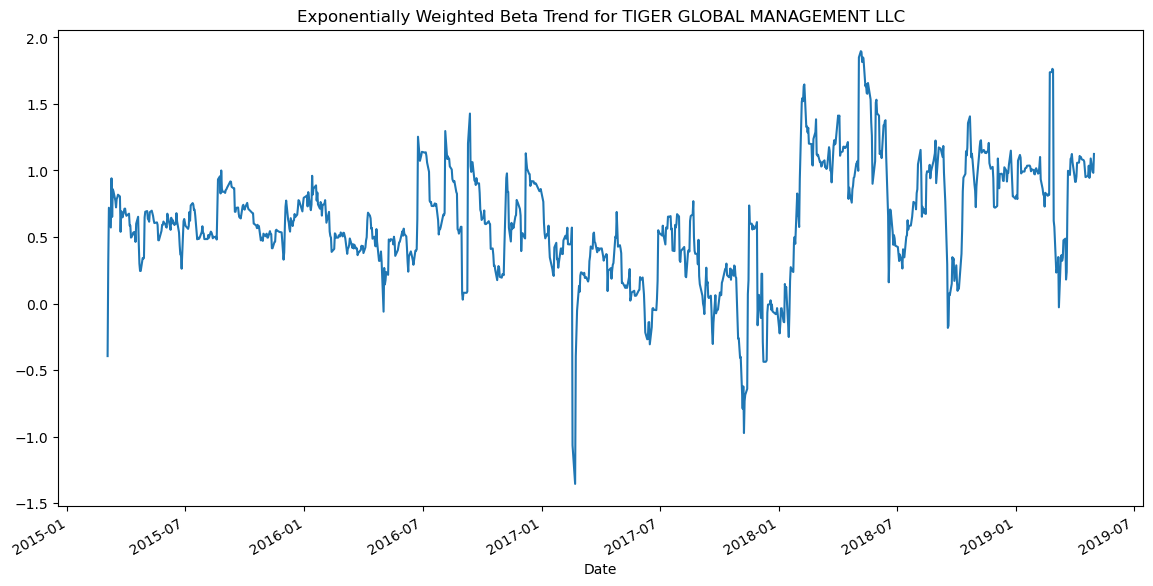

In [25]:
# Use `ewm` to calculate the rolling window

# Calculate exponentially weighted covariance of 'TIGER GLOBAL MANAGEMENT LLC' with S&P TSX 60
ewm_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].ewm(span=21).cov(combined_df['Daily_Returns'])

# Calculate exponentially weighted variance of S&P TSX 60
ewm_variance = combined_df['Daily_Returns'].ewm(span=21).var()

# Compute exponentially weighted beta for 'TIGER GLOBAL MANAGEMENT LLC'
ewm_beta = ewm_covariance / ewm_variance

# Plot the exponentially weighted beta trend
ewm_beta.plot(figsize=(14,7), title='Exponentially Weighted Beta Trend for TIGER GLOBAL MANAGEMENT LLC')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios

# Assuming a daily risk-free rate of 0 for simplicity
daily_risk_free_rate = 0.0

# Calculate the average daily return for each portfolio
avg_daily_return = combined_df.mean()

# Calculate the daily standard deviation for each portfolio
daily_std = combined_df.std()

# Calculate the daily Sharpe Ratios
daily_sharpe_ratios = (avg_daily_return - daily_risk_free_rate) / daily_std

# Annualize the Sharpe Ratios
annualized_sharpe_ratios = daily_sharpe_ratios * (252 ** 0.5)

# Display the annualized Sharpe Ratios
print(annualized_sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Daily_Returns                  0.195550
dtype: float64


<Axes: title={'center': 'Annualized Sharpe Ratios of Portfolios'}>

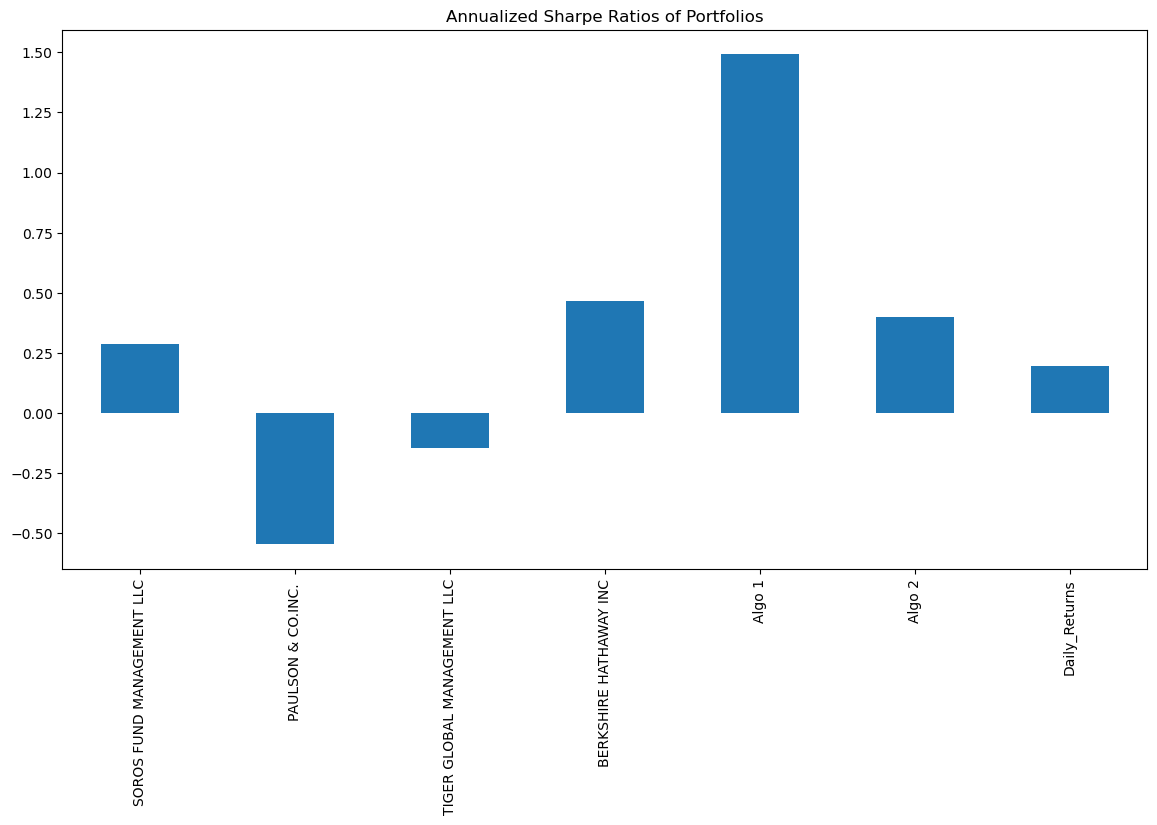

In [27]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind='bar', figsize=(14,7), title='Annualized Sharpe Ratios of Portfolios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [28]:
# Display the annualized Sharpe Ratios for reference
print(annualized_sharpe_ratios)

# Determine if algorithmic strategies outperform the market
algo_vs_market = annualized_sharpe_ratios[['Algo 1', 'Algo 2']] > annualized_sharpe_ratios['Daily_Returns']

# Determine if algorithmic strategies outperform the whales portfolios
whales_portfolios = annualized_sharpe_ratios.drop(['Algo 1', 'Algo 2', 'Daily_Returns'])
algo_vs_whales = annualized_sharpe_ratios[['Algo 1', 'Algo 2']] > whales_portfolios.max()

print("\nAlgorithmic vs Market:")
print(algo_vs_market)

print("\nAlgorithmic vs Whales:")
print(algo_vs_whales)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Daily_Returns                  0.195550
dtype: float64

Algorithmic vs Market:
Algo 1    True
Algo 2    True
dtype: bool

Algorithmic vs Whales:
Algo 1     True
Algo 2    False
dtype: bool


## Analysis:

### Algorithmic Strategies vs. Market (S&P TSX 60):

* Algo 1 (1.491514) has a significantly higher Sharpe Ratio than the market's Sharpe Ratio of 0.195550. This indicates that Algo 1 outperforms the market on a risk-adjusted basis.

* Algo 2 (0.396817) also outperforms the market, but not as dramatically as Algo 1.

### Algorithmic Strategies vs. Whales Portfolios:

* Algo 1 (1.491514) has the highest Sharpe Ratio among all portfolios, indicating it has the best risk-adjusted performance.

* Algo 2 (0.396817) also outperforms all the whales portfolios except for BERKSHIRE HATHAWAY INC.

### Conclusion:

* Both algorithmic strategies, especially Algo 1, demonstrate superior risk-adjusted performance compared to the market (S&P TSX 60) and most of the whales portfolios. Only BERKSHIRE HATHAWAY INC comes close to the performance of the algorithmic strategies, but it still falls short of Algo 1's impressive Sharpe Ratio.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
csv_path = Path("../Resources/aapl.csv")
aapl_df = pd.read_csv(csv_path)
aapl_df.head()

,Date,Close
0,02/01/2020 16:00:00,75.09
1,03/01/2020 16:00:00,74.36
2,06/01/2020 16:00:00,74.95
3,07/01/2020 16:00:00,74.60
4,08/01/2020 16:00:00,75.80


In [30]:
# Reading data from 2nd stock
csv_path = Path("../Resources/meta.csv")
meta_df = pd.read_csv(csv_path)
meta_df.head()

,Date,Close
0,02/01/2020 16:00:00,209.78
1,03/01/2020 16:00:00,208.67
2,06/01/2020 16:00:00,212.60
3,07/01/2020 16:00:00,213.06
4,08/01/2020 16:00:00,215.22


In [31]:
# Reading data from 3rd stock
csv_path = Path("../Resources/tsla.csv")
tsla_df = pd.read_csv(csv_path)
tsla_df.head()

,Date,Close
0,02/01/2020 16:00:00,28.68
1,03/01/2020 16:00:00,29.53
2,06/01/2020 16:00:00,30.10
3,07/01/2020 16:00:00,31.27
4,08/01/2020 16:00:00,32.81


In [32]:
# Combine all stocks in a single DataFrame

# Set the 'Date' column as the index for each DataFrame
aapl_df.set_index('Date', inplace=True)
meta_df.set_index('Date', inplace=True)
tsla_df.set_index('Date', inplace=True)

# Combine the DataFrames using concat
combined_my_df = pd.concat([aapl_df, meta_df, tsla_df], axis=1)

# Rename columns for clarity
combined_my_df.columns = ['AAPL', 'META', 'TSLA']

# Display the combined DataFrame
combined_my_df.head()

,AAPL,META,TSLA
Date,,,
02/01/2020 16:00:00,75.09,209.78,28.68
03/01/2020 16:00:00,74.36,208.67,29.53
06/01/2020 16:00:00,74.95,212.60,30.10
07/01/2020 16:00:00,74.60,213.06,31.27
08/01/2020 16:00:00,75.80,215.22,32.81


In [33]:
# Reset Date index
combined_my_df.reset_index(inplace=True)

# Display the updated DataFrame
combined_my_df.head()

,Date,AAPL,META,TSLA
0,02/01/2020 16:00:00,75.09,209.78,28.68
1,03/01/2020 16:00:00,74.36,208.67,29.53
2,06/01/2020 16:00:00,74.95,212.60,30.10
3,07/01/2020 16:00:00,74.60,213.06,31.27
4,08/01/2020 16:00:00,75.80,215.22,32.81


In [34]:
# Reorganize portfolio data by having a column per symbol

# Rename columns to specify 'Close' prices
combined_df.columns = ['AAPL_Close', 'META_Close', 'TSLA_Close']

# Display the reorganized DataFrame
combined_my_df.head()

ValueError: Length mismatch: Expected axis has 7 elements, new values have 3 elements

In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!